# EDA: Exploratory Data Analysis

In [1]:
import os

import numpy as np
import seaborn as sns

from src.config import Config
from src.data import load_news, load_price
from src.plots import plot_autocorrelation, plot_correlation_heatmap, plot_log_return_distribution, \
    plot_moving_averages, plot_ohlc_pairplot, plot_price_series, \
    plot_rolling_volatility

In [2]:
cfg = Config("../config/config.yaml")
sns.set_style("whitegrid")

In [3]:
price = load_price(str(os.path.join(cfg.data.raw_dir, cfg.data.name_prices)))
news = load_news(str(os.path.join(cfg.data.raw_dir, cfg.data.name_news)))

In [4]:
price.head()

,date,open,high,low,close,volume,adj_close
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [5]:
news.head()

,date,rank,headline
0,2008-08-08,top1,"b""Georgia 'downs two Russian warplanes' as cou..."
1,2008-08-08,top13,"b""So---Russia and Georgia are at war and the N..."
2,2008-08-08,top18,"b'Condoleezza Rice: ""The US would not act to p..."
3,2008-08-08,top3,b'Russia Today: Columns of troops roll into So...
4,2008-08-08,top25,"b""No Help for Mexico's Kidnapping Surge"""


In [6]:
df = price.copy()
df["log_return"] = np.log(df["adj_close"] / df["adj_close"].shift(1))
os.makedirs(cfg.data.fig_dir, exist_ok=True)

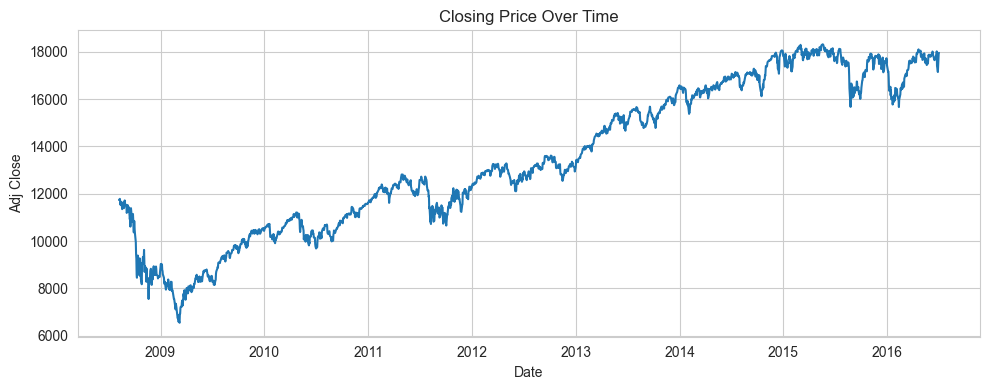

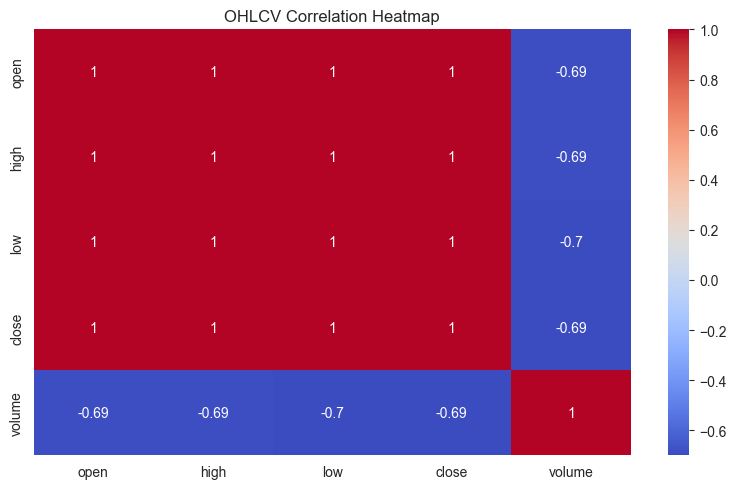

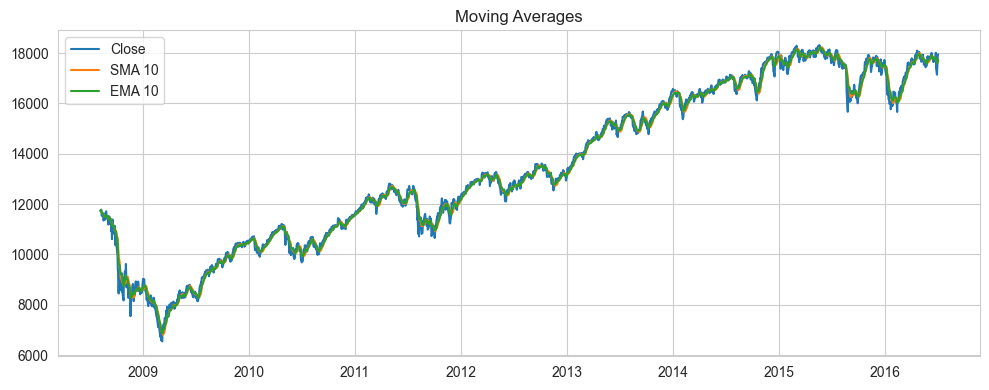

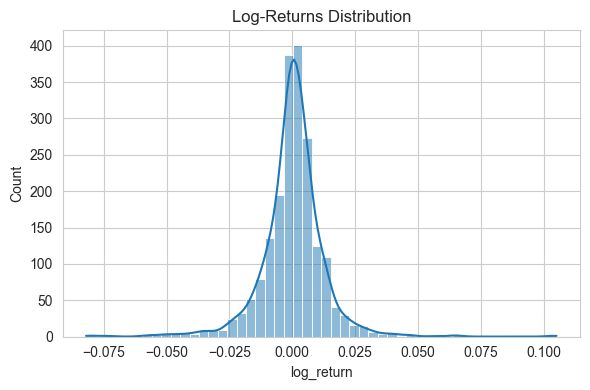

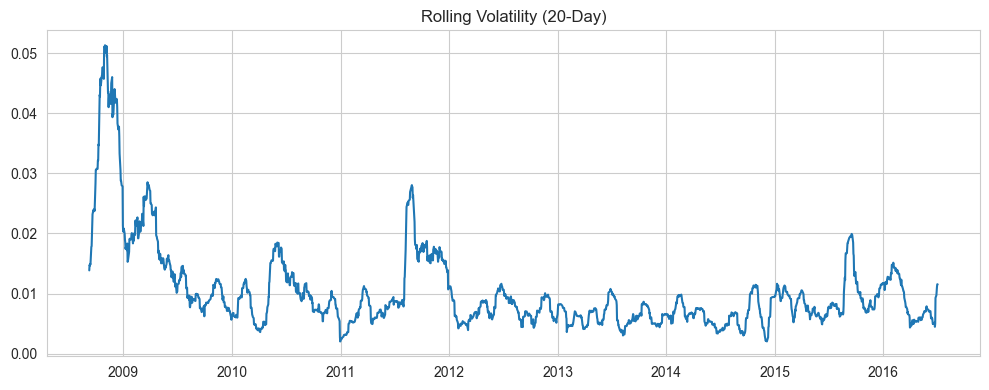

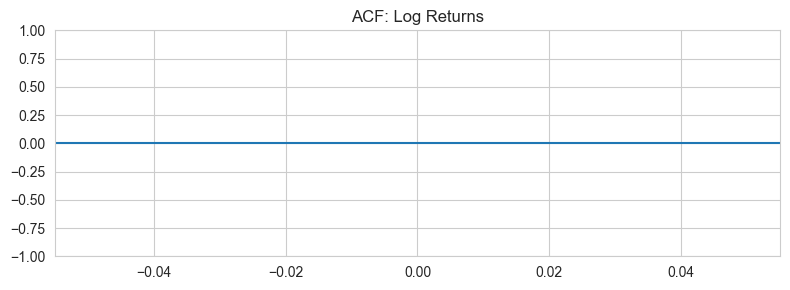

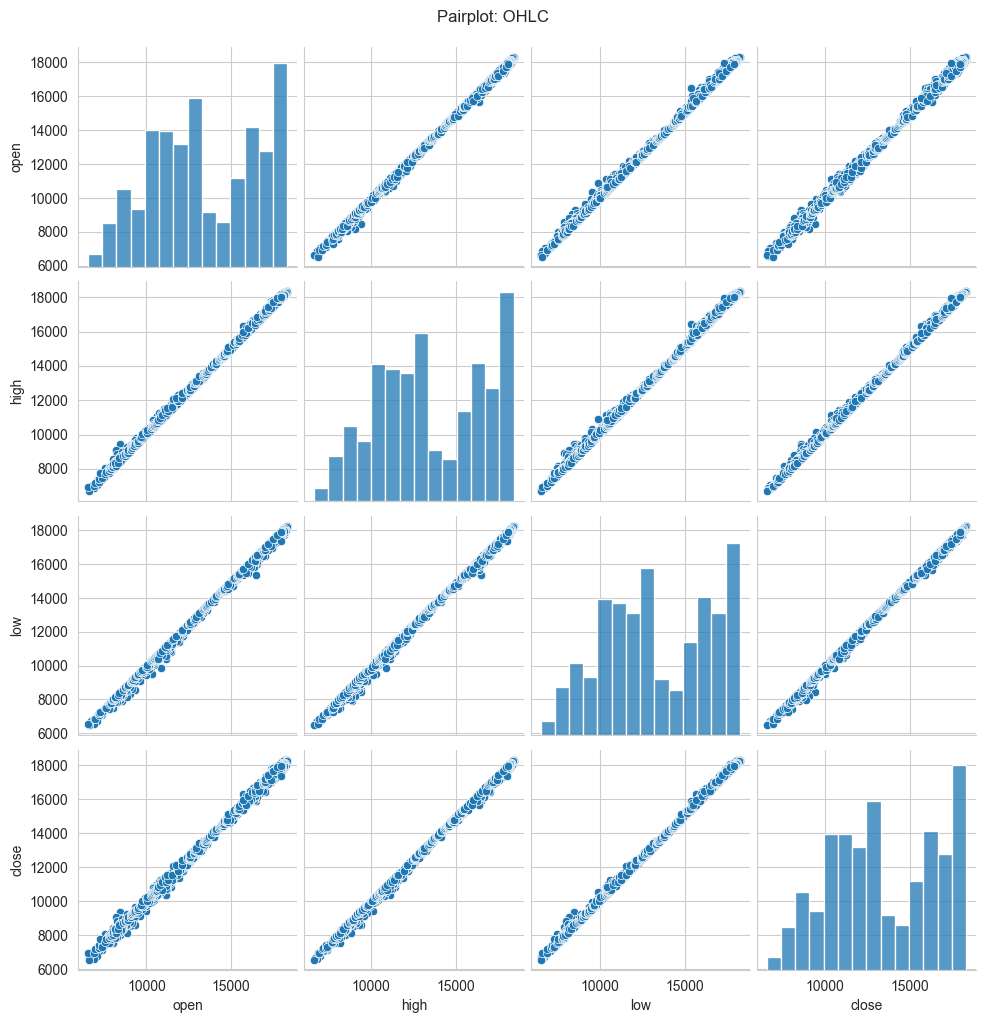

In [7]:
plot_price_series(df, cfg.data.fig_dir, "adj_close_price_series.png")
plot_correlation_heatmap(df, ["open", "high", "low", "close", "volume"] ,cfg.data.fig_dir, "ohclv_correlation_heatmap.png")
plot_moving_averages(df, cfg.data.fig_dir, "moving_averages.png")
plot_log_return_distribution(df, cfg.data.fig_dir, "log_return_distribution.png")
plot_rolling_volatility(df, cfg.data.fig_dir, "rolling_volatility.png")
plot_autocorrelation(df, cfg.data.fig_dir, "autocorrelation_returns.png")
plot_ohlc_pairplot(df, cfg.data.fig_dir, "ohlc_pairplot.png")